# Big data project

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [ ]:
df = pd.read_csv("prepared_data.csv")
df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
5,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
6,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
8,100014,0,Cash loans,F,N,Y,1,112500.000,652500.0,21177.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
9,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


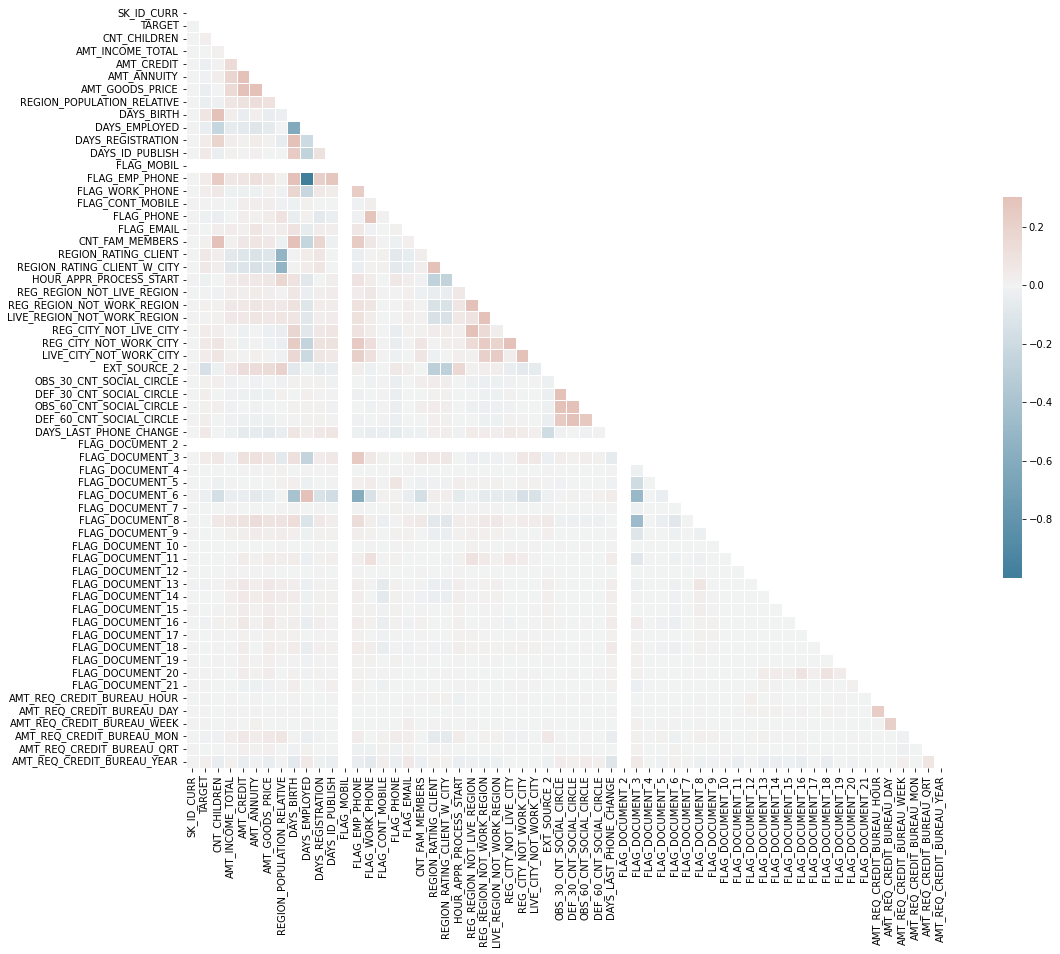

In [ ]:
def corr_matrix (df:pd.DataFrame):
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f, ax = plt.subplots(figsize=(20, 14))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

corr_matrix(df)

As we can see we don't have all the columns represented here and it's because we have non-numerical columns. We have to transform them or drop them if we already see that the colums have no impact.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263423 entries, 0 to 263422
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   263423 non-null  int64  
 1   TARGET                       263423 non-null  int64  
 2   NAME_CONTRACT_TYPE           263423 non-null  object 
 3   CODE_GENDER                  263423 non-null  object 
 4   FLAG_OWN_CAR                 263423 non-null  object 
 5   FLAG_OWN_REALTY              263423 non-null  object 
 6   CNT_CHILDREN                 263423 non-null  int64  
 7   AMT_INCOME_TOTAL             263423 non-null  float64
 8   AMT_CREDIT                   263423 non-null  float64
 9   AMT_ANNUITY                  263423 non-null  float64
 10  AMT_GOODS_PRICE              263423 non-null  float64
 11  NAME_TYPE_SUITE              263423 non-null  object 
 12  NAME_INCOME_TYPE             263423 non-null  object 
 13 

In [ ]:
df.select_dtypes(object)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,MONDAY,Government
3,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,THURSDAY,Religion
4,Cash loans,M,N,Y,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,WEDNESDAY,Other
...,...,...,...,...,...,...,...,...,...,...,...
263418,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,SATURDAY,Bank
263419,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,MONDAY,XNA
263420,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,THURSDAY,School
263421,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,WEDNESDAY,Business Entity Type 1


In [ ]:
def encoding (df:pd.DataFrame):
    encoder = preprocessing.LabelEncoder()
    df = df.apply(encoder.fit_transform)
    return df

In [ ]:
df_non_numerical = df.select_dtypes(object)
df_numerical = df.select_dtypes(include=np.number)

df_non_numerical = encoding(df_non_numerical)
df_non_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263423 entries, 0 to 263422
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   NAME_CONTRACT_TYPE          263423 non-null  int64
 1   CODE_GENDER                 263423 non-null  int64
 2   FLAG_OWN_CAR                263423 non-null  int64
 3   FLAG_OWN_REALTY             263423 non-null  int64
 4   NAME_TYPE_SUITE             263423 non-null  int64
 5   NAME_INCOME_TYPE            263423 non-null  int64
 6   NAME_EDUCATION_TYPE         263423 non-null  int64
 7   NAME_FAMILY_STATUS          263423 non-null  int64
 8   NAME_HOUSING_TYPE           263423 non-null  int64
 9   WEEKDAY_APPR_PROCESS_START  263423 non-null  int64
 10  ORGANIZATION_TYPE           263423 non-null  int64
dtypes: int64(11)
memory usage: 22.1 MB


In [ ]:
df = pd.concat([df_numerical, df_non_numerical], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263423 entries, 0 to 263422
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   263423 non-null  int64  
 1   TARGET                       263423 non-null  int64  
 2   CNT_CHILDREN                 263423 non-null  int64  
 3   AMT_INCOME_TOTAL             263423 non-null  float64
 4   AMT_CREDIT                   263423 non-null  float64
 5   AMT_ANNUITY                  263423 non-null  float64
 6   AMT_GOODS_PRICE              263423 non-null  float64
 7   REGION_POPULATION_RELATIVE   263423 non-null  float64
 8   DAYS_BIRTH                   263423 non-null  int64  
 9   DAYS_EMPLOYED                263423 non-null  int64  
 10  DAYS_REGISTRATION            263423 non-null  float64
 11  DAYS_ID_PUBLISH              263423 non-null  int64  
 12  FLAG_MOBIL                   263423 non-null  int64  
 13 

In [ ]:
df.drop(['FLAG_MOBIL','FLAG_DOCUMENT_2','SK_ID_CURR'], axis = 1, inplace = True)

We saw that colums was useless to us. 
Flag mobil and FLAG document 2 has only one value and SK ID CURR was an id that is pretty useless to train a model.

In [ ]:
def normalise (df :pd.DataFrame):
    normalizer = preprocessing.MinMaxScaler()
    df = pd.DataFrame(normalizer.fit_transform(df), columns=df.columns, index=df.index)
    return df

df = normalise(df)

df.head(5)

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,1.0,0.0,0.001508,0.090287,0.090032,0.077441,0.256321,0.888663,0.045086,0.852140,...,0.5,0.0,1.0,1.000000,1.000000,1.00,0.75,0.2,1.000000,0.087719
1,0.0,0.0,0.002085,0.311736,0.132924,0.271605,0.045016,0.476287,0.043648,0.951929,...,0.0,0.0,0.0,0.166667,0.571429,0.25,0.25,0.2,0.166667,0.684211
2,0.0,0.0,0.000354,0.022472,0.020025,0.023569,0.134897,0.347505,0.046161,0.827335,...,0.5,1.0,1.0,1.000000,1.000000,1.00,0.75,0.2,0.166667,0.192982
3,0.0,0.0,0.000816,0.116854,0.078975,0.117845,0.392880,0.297482,0.038820,0.825268,...,0.5,0.0,1.0,1.000000,1.000000,1.00,0.75,0.2,0.666667,0.649123
4,0.0,0.0,0.000623,0.111235,0.101018,0.103255,0.491595,0.466350,0.042604,0.798557,...,0.5,0.0,1.0,0.833333,0.571429,1.00,0.25,0.2,1.000000,0.578947


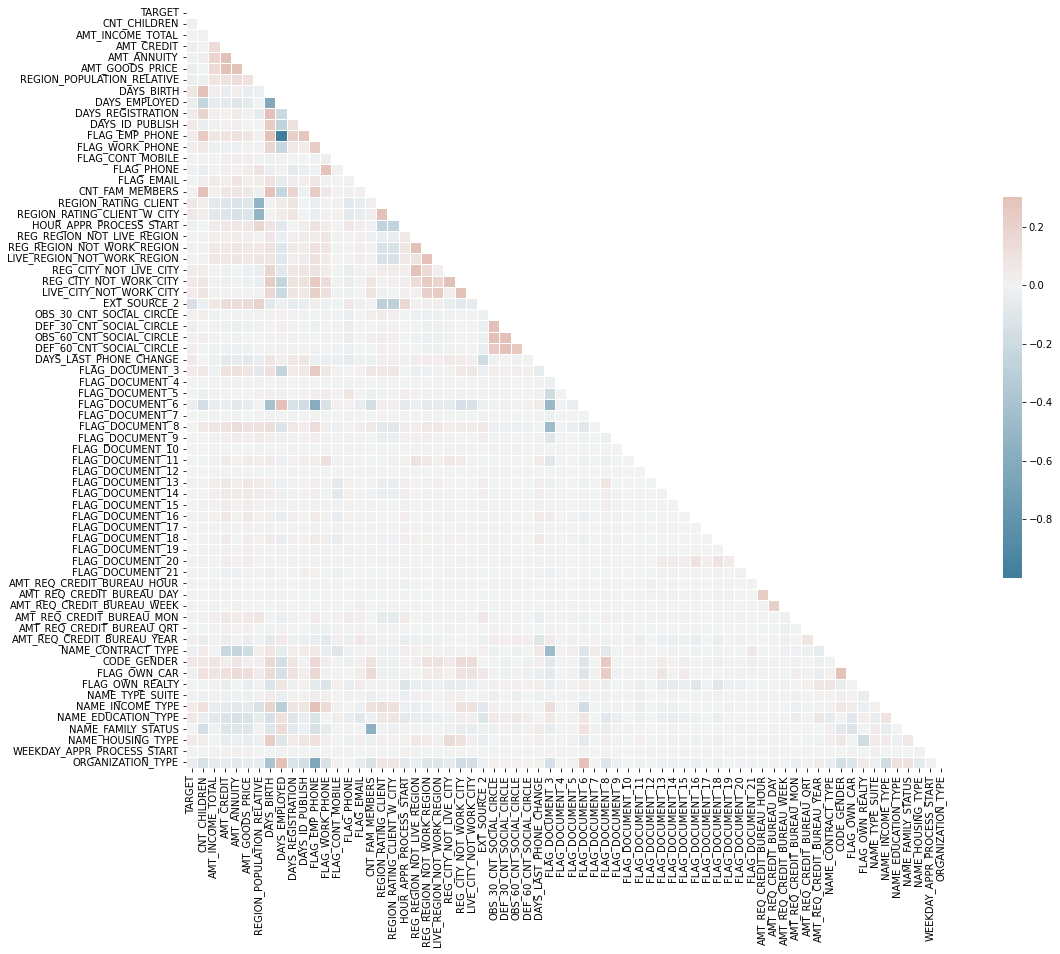

In [ ]:
corr_matrix(df)

In [ ]:
df.to_csv('standardised_data.csv', index = False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5e2ef48b-7703-4677-a8b9-64913d9e5bbb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>